In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.express as px

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image


In [4]:
benign_files = "dataset/trial1/Benign"
malignant_files = "dataset/trial1/Malignant"
normal_files = "dataset/trial1/Normal"

In [5]:
# function to load the images from the directories

def load_images(directory, label):
  images = []
  labels = []
  for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
      img_path = os.path.join(directory, filename)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      if img is not None:
        img = cv2.resize(img, (128, 128))
        images.append(img)
        labels.append(label)
  return images, labels

In [6]:
benign_images, benign_labels = load_images(benign_files, label=0)
malignant_images, malignant_labels = load_images(malignant_files, label=1)
normal_images, normal_labels = load_images(normal_files, label=2)

In [7]:
images = benign_images + malignant_images + normal_images
labels = benign_labels + malignant_labels + normal_labels

In [8]:
images = np.array(images)
labels = np.array(labels)


print(len(images))

1097


In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [10]:
categories = {
    "Benign": benign_files,
    "Malignant": malignant_files,
    "Normal": normal_files
}

In [12]:
model = Sequential([
  Input(shape=(128, 128, 1)),
  Conv2D(32, (3, 3), activation = 'relu', input_shape = (128, 128, 1)),
  MaxPooling2D((2,2)),
  Conv2D(64, (3, 3), activation = 'relu'),
  MaxPooling2D((2,2)),
  Conv2D(128, (3, 3), activation = 'relu'),
  MaxPooling2D((2,2)),
  Flatten(),
  Dense(512, activation = 'relu'),
  Dropout(0.5),
  Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train_encoded = to_categorical(y_train, num_classes = 3)
y_test_encoded = to_categorical(y_test, num_classes = 3)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train_encoded : ", y_train_encoded)

history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

print("Training history : ", history.history)

Shape of X_train :  (877, 128, 128)
Shape of y_train_encoded :  [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 479ms/step - accuracy: 0.4353 - loss: 88.3399 - val_accuracy: 0.8068 - val_loss: 0.6059
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 481ms/step - accuracy: 0.8392 - loss: 0.4679 - val_accuracy: 0.9489 - val_loss: 0.1893
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 445ms/step - accuracy: 0.9516 - loss: 0.1529 - val_accuracy: 0.9148 - val_loss: 0.1701
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step - accuracy: 0.9263 - loss: 0.2135 - val_accuracy: 0.9545 - val_loss: 0.1320
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 484ms/step - accuracy: 0.9596 - loss: 0.1321 - val_accuracy: 0.9659 - val_loss: 0.1055
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 485ms/step - accuracy: 0.9662 - loss: 0.1073 - val_accuracy: 0.9659 - val_loss: 0.1459
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 481ms/step - accuracy: 0.9859 - loss: 0.0

In [17]:
y_test_encoded = to_categorical(y_test, num_classes=3)

test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
#print(f'Test Loss: {test_loss}')
#print(f'Test Accuracy: {test_acc}')

print("Model Accuracy =",test_acc*100)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.9799 - loss: 0.0545
Model Accuracy = 97.27272987365723


In [18]:
def load_and_preprocess_image(img_path, target_size=(128, 128)):
    #print(img_path)
    img = image.load_img(img_path, target_size=target_size, color_mode='grayscale')
    img_array = image.img_to_array(img)
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.title('CT Scan')
    plt.axis('off')  # Hide axis
    plt.show()
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

In [19]:
def predict_image(model, img_path):
  img_array = load_and_preprocess_image(img_path)
  prediction = model.predict(img_array)
  class_index = np.argmax(prediction, axis = 1)
  return class_index[0]

In [30]:
class_labels = ['Benign', 'Malignant', 'Normal']

test_img = 'dataset/trial/test/m7.jpg'

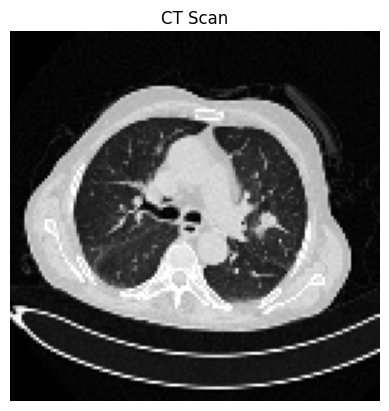

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1
The model predicts that the image as : Malignant


In [33]:
predicted_class_index = predict_image(model, test_img)
predicted_class = class_labels[predicted_class_index]
print(predicted_class_index)

print(f'The model predicts that the image as : {predicted_class}')

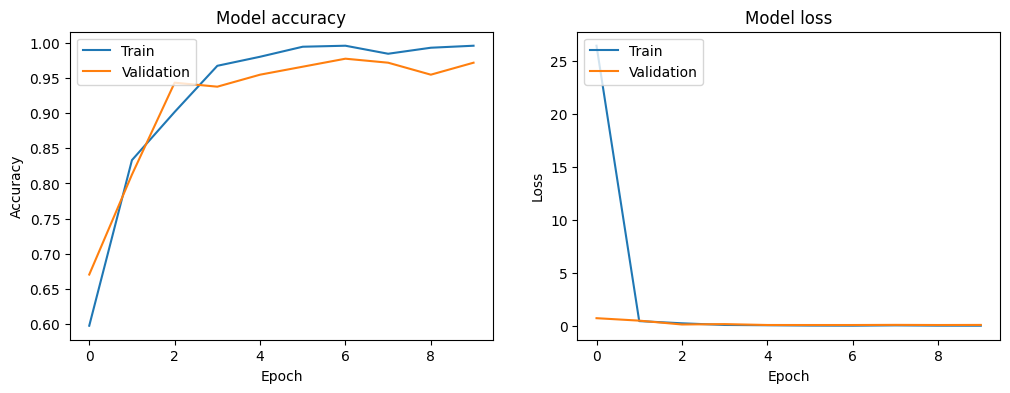

In [66]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
'''
for category, image_dir in categories.items():
  image_path = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith((".jpg", ".png"))]

  fig, ax = plt.subplots(1, 3, figsize=(8, 8))
  ax = ax.ravel()

  for i, img_path in enumerate(np.random.choice(image_path, size=3, replace=False)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title(category)
  plt.show()
'''